#  diff/same/hps/lps test on model trained on frontal faces - normalized by max value of all types

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df = pd.read_csv('/home/administrator/experiments/high_importance_features_full_dataset/vgg16/results/comparisons.csv')

# df = pd.read_csv('/home/administrator/experiments/5_ids_300_img_per_id_val_50/vgg16/results/comparisons_with_fc7_linear.csv')
df = pd.read_csv('/home/ssd_storage/experiments/MR/asians/all_ids_asians.csv')

title = 'all_ids_asians'
treshold =224.775

# df = pd.read_csv(r"/home/administrator/experiments/500_ids_300_img_per_id_2/vgg16/results/100_ids_non_frontal_300_per_id_comparison.csv")
pd.set_option('display.max_rows', df.shape[0]+1)

print(df)

      Unnamed: 0    id  img                  Unnamed: 0.1      input  \
0              0   200   50    ('01_f1.jpg', '02_f2.jpg')  303.38650   
1              1   200   50    ('02_f1.jpg', '03_f2.jpg')  231.38298   
2              2   200   50    ('03_f1.jpg', '04_f2.jpg')  216.10054   
3              3   200   50    ('04_f1.jpg', '05_f2.jpg')  282.85318   
4              4   200   50   ('05_f1.jpeg', '06_f2.jpg')  247.22649   
5              5   200   50   ('06_f1.jpg', '07_f2.jpeg')  152.61911   
6              6   200   50   ('07_f1.jpeg', '08_f2.jpg')  311.55463   
7              7   200   50    ('08_f1.jpg', '09_f2.jpg')  310.98874   
8              8   200   50    ('09_f1.jpg', '10_f2.jpg')  258.16058   
9              9   200   50    ('10_f1.jpg', '11_f2.jpg')  166.32971   
10            10   200   50    ('11_f1.jpg', '12_f2.jpg')  284.57547   
11            11   200   50    ('12_f1.jpg', '13_f2.png')  192.70952   
12            12   200   50    ('13_f1.jpg', '15_f3.jpg')  163.3

In [5]:
# change unnamed column to 'pairs'
df = df.rename(columns = {'Unnamed: 0.1':'pairs'})
df

img1            img2  Unnamed: 0    id  img      input  \
0      ('01_f1.jpg'    '02_f2.jpg')           0   200   50  303.38650   
1      ('02_f1.jpg'    '03_f2.jpg')           1   200   50  231.38298   
2      ('03_f1.jpg'    '04_f2.jpg')           2   200   50  216.10054   
3      ('04_f1.jpg'    '05_f2.jpg')           3   200   50  282.85318   
4     ('05_f1.jpeg'    '06_f2.jpg')           4   200   50  247.22649   
5      ('06_f1.jpg'   '07_f2.jpeg')           5   200   50  152.61911   
6     ('07_f1.jpeg'    '08_f2.jpg')           6   200   50  311.55463   
7      ('08_f1.jpg'    '09_f2.jpg')           7   200   50  310.98874   
8      ('09_f1.jpg'    '10_f2.jpg')           8   200   50  258.16058   
9      ('10_f1.jpg'    '11_f2.jpg')           9   200   50  166.32971   
10     ('11_f1.jpg'    '12_f2.jpg')          10   200   50  284.57547   
11     ('12_f1.jpg'    '13_f2.png')          11   200   50  192.70952   
12     ('13_f1.jpg'    '15_f3.jpg')          12   200   50  163.32732   
13     ('15_f1.jpg'    '16_f2.jpg')          13   200   50  191.34343   
14     ('16_f1.jpg'    '17_f2.jpg')          14   200   50  293.52430   
15     ('17_f1.jpg'    '18_f2.jpg')          15   200   50  257.03268   
16     ('18_f1.jpg'    '19_f2.jpg')          16   200   50  195.06328   
17     ('19_f1.jpg'    '20_f2.jpg')          17   200   50  226.38820   
18     ('20_f1.jpg'    '21_f2.jpg')          18   200   50  176.01862   
19     ('21_f1.jpg'    '01_f2.jpg')          19   200   50  196.96336   
20     ('01_f1.jpg'    '01_f2.jpg')          20   200   50  182.41900   
21     ('02_f1.jpg'    '02_f2.jpg')          21   200   50  144.72247   
22     ('03_f1.jpg'    '03_f2.jpg')          22   200   50  203.92413   
23     ('04_f1.jpg'    '04_f2.jpg')          23   200   50  206.66823   
24    ('05_f1.jpeg'    '05_f2.jpg')          24   200   50  247.81926   
25     ('06_f1.jpg'    '06_f2.jpg')          25   200   50  279.47855   
26    ('07_f1.jpeg'   '07_f2.jpeg')          26   200   50  167.65450   
27     ('08_f1.jpg'    '08_f2.jpg')          27   200   50  311.13773   
28     ('09_f1.jpg'    '09_f2.jpg')          28   200   50  237.19879   
29     ('10_f1.jpg'    '10_f2.jpg')          29   200   50  287.72296   
30     ('11_f1.jpg'    '11_f2.jpg')          30   200   50  237.90773   
31     ('12_f1.jpg'    '12_f2.jpg')          31   200   50  238.24542   
32     ('13_f1.jpg'    '13_f2.png')          32   200   50  178.24442   
33     ('15_f1.jpg'    '15_f3.jpg')          33   200   50  155.68050   
34     ('16_f1.jpg'    '16_f2.jpg')          34   200   50  291.35745   
35     ('17_f1.jpg'    '17_f2.jpg')          35   200   50  191.91895   
36     ('18_f1.jpg'    '18_f2.jpg')          36   200   50  177.35901   
37     ('19_f1.jpg'    '19_f2.jpg')          37   200   50  150.07912   
38     ('20_f1.jpg'    '20_f2.jpg')          38   200   50  122.52171   
39     ('21_f1.jpg'    '21_f2.jpg')          39   200   50  147.08746   
40     ('01_f1.jpg'    '02_f2.jpg')           0     2  200  303.38650   
41     ('02_f1.jpg'    '03_f2.jpg')           1     2  200  231.38298   
42     ('03_f1.jpg'    '04_f2.jpg')           2     2  200  216.10054   
43     ('04_f1.jpg'    '05_f2.jpg')           3     2  200  282.85318   
44    ('05_f1.jpeg'    '06_f2.jpg')           4     2  200  247.22649   
45     ('06_f1.jpg'   '07_f2.jpeg')           5     2  200  152.61911   
46    ('07_f1.jpeg'    '08_f2.jpg')           6     2  200  311.55463   
47     ('08_f1.jpg'    '09_f2.jpg')           7     2  200  310.98874   
48     ('09_f1.jpg'    '10_f2.jpg')           8     2  200  258.16058   
49     ('10_f1.jpg'    '11_f2.jpg')           9     2  200  166.32971   
50     ('11_f1.jpg'    '12_f2.jpg')          10     2  200  284.57547   
51     ('12_f1.jpg'    '13_f2.png')          11     2  200  192.70952   
52     ('13_f1.jpg'    '15_f3.jpg')          12     2  200  163.32732   
53     ('15_f1.jpg'    '16_f2.jpg')          13     2  200  191.34343   


In [4]:
#split the tuples to two columns
df_splited = df['pairs'].str.split(',', expand=True)

#adding   
df.insert(loc=3, column='img1', value=df_splited[0] )
df.insert(loc=4, column='img2', value=df_splited[1] )

  
# Dropping old Name columns 
df.drop(columns =["pairs"], inplace = True) 


KeyError: 'pairs'

In [6]:
df

img1            img2  Unnamed: 0    id  img      input  \
0      ('01_f1.jpg'    '02_f2.jpg')           0   200   50  303.38650   
1      ('02_f1.jpg'    '03_f2.jpg')           1   200   50  231.38298   
2      ('03_f1.jpg'    '04_f2.jpg')           2   200   50  216.10054   
3      ('04_f1.jpg'    '05_f2.jpg')           3   200   50  282.85318   
4     ('05_f1.jpeg'    '06_f2.jpg')           4   200   50  247.22649   
5      ('06_f1.jpg'   '07_f2.jpeg')           5   200   50  152.61911   
6     ('07_f1.jpeg'    '08_f2.jpg')           6   200   50  311.55463   
7      ('08_f1.jpg'    '09_f2.jpg')           7   200   50  310.98874   
8      ('09_f1.jpg'    '10_f2.jpg')           8   200   50  258.16058   
9      ('10_f1.jpg'    '11_f2.jpg')           9   200   50  166.32971   
10     ('11_f1.jpg'    '12_f2.jpg')          10   200   50  284.57547   
11     ('12_f1.jpg'    '13_f2.png')          11   200   50  192.70952   
12     ('13_f1.jpg'    '15_f3.jpg')          12   200   50  163.32732   
13     ('15_f1.jpg'    '16_f2.jpg')          13   200   50  191.34343   
14     ('16_f1.jpg'    '17_f2.jpg')          14   200   50  293.52430   
15     ('17_f1.jpg'    '18_f2.jpg')          15   200   50  257.03268   
16     ('18_f1.jpg'    '19_f2.jpg')          16   200   50  195.06328   
17     ('19_f1.jpg'    '20_f2.jpg')          17   200   50  226.38820   
18     ('20_f1.jpg'    '21_f2.jpg')          18   200   50  176.01862   
19     ('21_f1.jpg'    '01_f2.jpg')          19   200   50  196.96336   
20     ('01_f1.jpg'    '01_f2.jpg')          20   200   50  182.41900   
21     ('02_f1.jpg'    '02_f2.jpg')          21   200   50  144.72247   
22     ('03_f1.jpg'    '03_f2.jpg')          22   200   50  203.92413   
23     ('04_f1.jpg'    '04_f2.jpg')          23   200   50  206.66823   
24    ('05_f1.jpeg'    '05_f2.jpg')          24   200   50  247.81926   
25     ('06_f1.jpg'    '06_f2.jpg')          25   200   50  279.47855   
26    ('07_f1.jpeg'   '07_f2.jpeg')          26   200   50  167.65450   
27     ('08_f1.jpg'    '08_f2.jpg')          27   200   50  311.13773   
28     ('09_f1.jpg'    '09_f2.jpg')          28   200   50  237.19879   
29     ('10_f1.jpg'    '10_f2.jpg')          29   200   50  287.72296   
30     ('11_f1.jpg'    '11_f2.jpg')          30   200   50  237.90773   
31     ('12_f1.jpg'    '12_f2.jpg')          31   200   50  238.24542   
32     ('13_f1.jpg'    '13_f2.png')          32   200   50  178.24442   
33     ('15_f1.jpg'    '15_f3.jpg')          33   200   50  155.68050   
34     ('16_f1.jpg'    '16_f2.jpg')          34   200   50  291.35745   
35     ('17_f1.jpg'    '17_f2.jpg')          35   200   50  191.91895   
36     ('18_f1.jpg'    '18_f2.jpg')          36   200   50  177.35901   
37     ('19_f1.jpg'    '19_f2.jpg')          37   200   50  150.07912   
38     ('20_f1.jpg'    '20_f2.jpg')          38   200   50  122.52171   
39     ('21_f1.jpg'    '21_f2.jpg')          39   200   50  147.08746   
40     ('01_f1.jpg'    '02_f2.jpg')           0     2  200  303.38650   
41     ('02_f1.jpg'    '03_f2.jpg')           1     2  200  231.38298   
42     ('03_f1.jpg'    '04_f2.jpg')           2     2  200  216.10054   
43     ('04_f1.jpg'    '05_f2.jpg')           3     2  200  282.85318   
44    ('05_f1.jpeg'    '06_f2.jpg')           4     2  200  247.22649   
45     ('06_f1.jpg'   '07_f2.jpeg')           5     2  200  152.61911   
46    ('07_f1.jpeg'    '08_f2.jpg')           6     2  200  311.55463   
47     ('08_f1.jpg'    '09_f2.jpg')           7     2  200  310.98874   
48     ('09_f1.jpg'    '10_f2.jpg')           8     2  200  258.16058   
49     ('10_f1.jpg'    '11_f2.jpg')           9     2  200  166.32971   
50     ('11_f1.jpg'    '12_f2.jpg')          10     2  200  284.57547   
51     ('12_f1.jpg'    '13_f2.png')          11     2  200  192.70952   
52     ('13_f1.jpg'    '15_f3.jpg')          12     2  200  163.32732   
53     ('15_f1.jpg'    '16_f2.jpg')          13     2  200  191.34343   


In [7]:
#reorder columns by layer order
df = df[['img1', 'img2','id', 'img', 'input', 'conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8','type' ]]
# df = df[['img1', 'img2', 'input', 'conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8','type' ]]

In [8]:
df

img1            img2    id  img      input       conv1  \
0      ('01_f1.jpg'    '02_f2.jpg')   200   50  303.38650  603.198700   
1      ('02_f1.jpg'    '03_f2.jpg')   200   50  231.38298  486.315670   
2      ('03_f1.jpg'    '04_f2.jpg')   200   50  216.10054  429.602720   
3      ('04_f1.jpg'    '05_f2.jpg')   200   50  282.85318  490.994840   
4     ('05_f1.jpeg'    '06_f2.jpg')   200   50  247.22649  420.378850   
5      ('06_f1.jpg'   '07_f2.jpeg')   200   50  152.61911  388.476380   
6     ('07_f1.jpeg'    '08_f2.jpg')   200   50  311.55463  583.249450   
7      ('08_f1.jpg'    '09_f2.jpg')   200   50  310.98874  501.356300   
8      ('09_f1.jpg'    '10_f2.jpg')   200   50  258.16058  558.839400   
9      ('10_f1.jpg'    '11_f2.jpg')   200   50  166.32971  397.607540   
10     ('11_f1.jpg'    '12_f2.jpg')   200   50  284.57547  479.342000   
11     ('12_f1.jpg'    '13_f2.png')   200   50  192.70952  339.250700   
12     ('13_f1.jpg'    '15_f3.jpg')   200   50  163.32732  398.463130   
13     ('15_f1.jpg'    '16_f2.jpg')   200   50  191.34343  347.428680   
14     ('16_f1.jpg'    '17_f2.jpg')   200   50  293.52430  572.509600   
15     ('17_f1.jpg'    '18_f2.jpg')   200   50  257.03268  446.202400   
16     ('18_f1.jpg'    '19_f2.jpg')   200   50  195.06328  361.126680   
17     ('19_f1.jpg'    '20_f2.jpg')   200   50  226.38820  461.340500   
18     ('20_f1.jpg'    '21_f2.jpg')   200   50  176.01862  409.307600   
19     ('21_f1.jpg'    '01_f2.jpg')   200   50  196.96336  345.152250   
20     ('01_f1.jpg'    '01_f2.jpg')   200   50  182.41900  336.583860   
21     ('02_f1.jpg'    '02_f2.jpg')   200   50  144.72247  333.979680   
22     ('03_f1.jpg'    '03_f2.jpg')   200   50  203.92413  404.891940   
23     ('04_f1.jpg'    '04_f2.jpg')   200   50  206.66823  443.434200   
24    ('05_f1.jpeg'    '05_f2.jpg')   200   50  247.81926  472.957800   
25     ('06_f1.jpg'    '06_f2.jpg')   200   50  279.47855  510.569370   
26    ('07_f1.jpeg'   '07_f2.jpeg')   200   50  167.65450  426.891270   
27     ('08_f1.jpg'    '08_f2.jpg')   200   50  311.13773  475.350520   
28     ('09_f1.jpg'    '09_f2.jpg')   200   50  237.19879  453.384800   
29     ('10_f1.jpg'    '10_f2.jpg')   200   50  287.72296  592.199900   
30     ('11_f1.jpg'    '11_f2.jpg')   200   50  237.90773  463.612030   
31     ('12_f1.jpg'    '12_f2.jpg')   200   50  238.24542  382.350070   
32     ('13_f1.jpg'    '13_f2.png')   200   50  178.24442  307.529080   
33     ('15_f1.jpg'    '15_f3.jpg')   200   50  155.68050  440.037080   
34     ('16_f1.jpg'    '16_f2.jpg')   200   50  291.35745  538.378050   
35     ('17_f1.jpg'    '17_f2.jpg')   200   50  191.91895  374.502350   
36     ('18_f1.jpg'    '18_f2.jpg')   200   50  177.35901  337.953950   
37     ('19_f1.jpg'    '19_f2.jpg')   200   50  150.07912  275.492770   
38     ('20_f1.jpg'    '20_f2.jpg')   200   50  122.52171  262.175170   
39     ('21_f1.jpg'    '21_f2.jpg')   200   50  147.08746  355.821840   
40     ('01_f1.jpg'    '02_f2.jpg')     2  200  303.38650  164.552030   
41     ('02_f1.jpg'    '03_f2.jpg')     2  200  231.38298  143.496380   
42     ('03_f1.jpg'    '04_f2.jpg')     2  200  216.10054  118.724760   
43     ('04_f1.jpg'    '05_f2.jpg')     2  200  282.85318  157.476820   
44    ('05_f1.jpeg'    '06_f2.jpg')     2  200  247.22649  125.195950   
45     ('06_f1.jpg'   '07_f2.jpeg')     2  200  152.61911  105.063354   
46    ('07_f1.jpeg'    '08_f2.jpg')     2  200  311.55463  171.745940   
47     ('08_f1.jpg'    '09_f2.jpg')     2  200  310.98874  147.000960   
48     ('09_f1.jpg'    '10_f2.jpg')     2  200  258.16058  175.212000   
49     ('10_f1.jpg'    '11_f2.jpg')     2  200  166.32971  121.715614   
50     ('11_f1.jpg'    '12_f2.jpg')     2  200  284.57547  136.028720   
51     ('12_f1.jpg'    '13_f2.png')     2  200  192.70952  107.707310   
52     ('13_f1.jpg'    '15_f3.jpg')     2  200  163.32732  114.522340   
53     ('15_f1.jpg'    '16_f2.jpg')     2  200  191.34343  103.003940   


In [7]:
#remove all last rows - save only DIFF,HPS,LPS,SAME type.

df = df[~df.type.str.contains("frontal")]


In [55]:
 df.loc[df['id'] == '5']

Empty DataFrame
Columns: [img1, img2, id, img, input, conv1, conv2, conv3, conv4, conv5, fc6, fc7, fc8, type]
Index: []

In [73]:
#if csv with all ids and all imgs, else - do not run this and run the next next cell:
all_ids = df['id'].unique()
all_img = df['img'].unique()
#all_ids = ['5']
#all_img = ['10']

for ide in all_ids:
    for img in all_img:
        print('id:', type(ide), 'img', img)
        curent_df_id = df.loc[df['id'] == int(ide)]
        curent_df_id_img = curent_df_id.loc[df['img'] == int(img)]
        max_value_df = curent_df_id_img.max()
        print(curent_df_id_img)
        print(max_value_df)
        df_all = curent_df_id_img.drop(columns=['img1', 'img2'])
#         normalized_treshold = treshold/max_value_df['fc7']
        for x in df_all.drop(columns=['type','id','img']).columns:
            df_all[x]= (df_all[x]/df_all[x].max()) 
        #print(df_all)
#         df_all.to_csv('/home/ssd_storage/experiments/MR/asians/asians_norm/'+str(ide) + '_ids_'+ str(img) +'_img.csv')

        

id: <class 'numpy.int64'> img 50
             img1            img2   id  img      input      conv1       conv2  \
0    ('01_f1.jpg'    '02_f2.jpg')  200   50  303.38650  603.19870  1143.46860   
1    ('02_f1.jpg'    '03_f2.jpg')  200   50  231.38298  486.31567   968.58430   
2    ('03_f1.jpg'    '04_f2.jpg')  200   50  216.10054  429.60272   897.39310   
3    ('04_f1.jpg'    '05_f2.jpg')  200   50  282.85318  490.99484   930.12933   
4   ('05_f1.jpeg'    '06_f2.jpg')  200   50  247.22649  420.37885   813.38700   
5    ('06_f1.jpg'   '07_f2.jpeg')  200   50  152.61911  388.47638   831.40490   
6   ('07_f1.jpeg'    '08_f2.jpg')  200   50  311.55463  583.24945  1153.84410   
7    ('08_f1.jpg'    '09_f2.jpg')  200   50  310.98874  501.35630   942.77760   
8    ('09_f1.jpg'    '10_f2.jpg')  200   50  258.16058  558.83940  1064.25840   
9    ('10_f1.jpg'    '11_f2.jpg')  200   50  166.32971  397.60754   789.31940   
10   ('11_f1.jpg'    '12_f2.jpg')  200   50  284.57547  479.34200   884.0406

               img1            img2  id  img      input       conv1  \
1400   ('01_f1.jpg'    '02_f2.jpg')   2  100  303.38650  117.330670   
1401   ('02_f1.jpg'    '03_f2.jpg')   2  100  231.38298   93.804910   
1402   ('03_f1.jpg'    '04_f2.jpg')   2  100  216.10054   86.595250   
1403   ('04_f1.jpg'    '05_f2.jpg')   2  100  282.85318  139.257860   
1404  ('05_f1.jpeg'    '06_f2.jpg')   2  100  247.22649   94.144295   
1405   ('06_f1.jpg'   '07_f2.jpeg')   2  100  152.61911   67.895700   
1406  ('07_f1.jpeg'    '08_f2.jpg')   2  100  311.55463  114.951240   
1407   ('08_f1.jpg'    '09_f2.jpg')   2  100  310.98874  112.814575   
1408   ('09_f1.jpg'    '10_f2.jpg')   2  100  258.16058  134.616150   
1409   ('10_f1.jpg'    '11_f2.jpg')   2  100  166.32971   73.531364   
1410   ('11_f1.jpg'    '12_f2.jpg')   2  100  284.57547  106.402550   
1411   ('12_f1.jpg'    '13_f2.png')   2  100  192.70952   99.372925   
1412   ('13_f1.jpg'    '15_f3.jpg')   2  100  163.32732   72.503100   
1413  

id: <class 'numpy.int64'> img 20
              img1            img2   id  img      input      conv1  \
840   ('01_f1.jpg'    '02_f2.jpg')  500   20  303.38650  631.81050   
841   ('02_f1.jpg'    '03_f2.jpg')  500   20  231.38298  515.52814   
842   ('03_f1.jpg'    '04_f2.jpg')  500   20  216.10054  449.90330   
843   ('04_f1.jpg'    '05_f2.jpg')  500   20  282.85318  552.25130   
844  ('05_f1.jpeg'    '06_f2.jpg')  500   20  247.22649  455.10710   
845   ('06_f1.jpg'   '07_f2.jpeg')  500   20  152.61911  397.79350   
846  ('07_f1.jpeg'    '08_f2.jpg')  500   20  311.55463  624.83750   
847   ('08_f1.jpg'    '09_f2.jpg')  500   20  310.98874  533.41250   
848   ('09_f1.jpg'    '10_f2.jpg')  500   20  258.16058  592.10870   
849   ('10_f1.jpg'    '11_f2.jpg')  500   20  166.32971  414.96918   
850   ('11_f1.jpg'    '12_f2.jpg')  500   20  284.57547  513.82600   
851   ('12_f1.jpg'    '13_f2.png')  500   20  192.70952  358.79858   
852   ('13_f1.jpg'    '15_f3.jpg')  500   20  163.32732  

id: <class 'numpy.int64'> img 20
Empty DataFrame
Columns: [img1, img2, id, img, input, conv1, conv2, conv3, conv4, conv5, fc6, fc7, fc8, type]
Index: []
img1    NaN
img2    NaN
id      NaN
img     NaN
input   NaN
conv1   NaN
conv2   NaN
conv3   NaN
conv4   NaN
conv5   NaN
fc6     NaN
fc7     NaN
fc8     NaN
type    NaN
dtype: float64
id: <class 'numpy.int64'> img 10
Empty DataFrame
Columns: [img1, img2, id, img, input, conv1, conv2, conv3, conv4, conv5, fc6, fc7, fc8, type]
Index: []
img1    NaN
img2    NaN
id      NaN
img     NaN
input   NaN
conv1   NaN
conv2   NaN
conv3   NaN
conv4   NaN
conv5   NaN
fc6     NaN
fc7     NaN
fc8     NaN
type    NaN
dtype: float64
id: <class 'numpy.int64'> img 1
              img1            img2  id  img      input       conv1      conv2  \
320   ('01_f1.jpg'    '02_f2.jpg')  50    1  303.38650  129.308790  84.222280   
321   ('02_f1.jpg'    '03_f2.jpg')  50    1  231.38298   95.074760  60.678158   
322   ('03_f1.jpg'    '04_f2.jpg')  50    1  216.1005

id: <class 'numpy.int64'> img 200
               img1            img2    id  img      input      conv1  \
2080   ('01_f1.jpg'    '02_f2.jpg')  1000  200  303.38650  578.23224   
2081   ('02_f1.jpg'    '03_f2.jpg')  1000  200  231.38298  445.97460   
2082   ('03_f1.jpg'    '04_f2.jpg')  1000  200  216.10054  450.39886   
2083   ('04_f1.jpg'    '05_f2.jpg')  1000  200  282.85318  581.81476   
2084  ('05_f1.jpeg'    '06_f2.jpg')  1000  200  247.22649  440.81860   
2085   ('06_f1.jpg'   '07_f2.jpeg')  1000  200  152.61911  392.41116   
2086  ('07_f1.jpeg'    '08_f2.jpg')  1000  200  311.55463  587.32750   
2087   ('08_f1.jpg'    '09_f2.jpg')  1000  200  310.98874  527.33514   
2088   ('09_f1.jpg'    '10_f2.jpg')  1000  200  258.16058  513.89850   
2089   ('10_f1.jpg'    '11_f2.jpg')  1000  200  166.32971  394.91000   
2090   ('11_f1.jpg'    '12_f2.jpg')  1000  200  284.57547  480.61398   
2091   ('12_f1.jpg'    '13_f2.png')  1000  200  192.70952  352.84167   
2092   ('13_f1.jpg'    '15_f3.

In [74]:
#combine all csvs to one
import os
import glob
import pandas as pd
os.chdir("/home/ssd_storage/experiments/MR/asians/asians_norm/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [10]:
grouped_df = df.groupby("id")


In [12]:
grouped_df

In [9]:
max_value_df = df.max()
max_value_df

img1      ('21_f1.jpg'
img2      '21_f2.jpg')
id                1000
img                300
input          311.555
conv1           755.29
conv2          1565.06
conv3          2418.13
conv4          949.477
conv5          429.128
fc6            240.392
fc7            169.076
fc8            390.946
type        same_pairs
dtype: object

In [10]:
df = df.reset_index(drop=True)
df
df = df.drop(columns=['img1', 'img2'])

In [11]:
normalized_treshold = treshold/max_value_df['fc7']


In [12]:
df
# df['input']= (df['input']/df['input'].max()) 

for x in df.drop(columns=['type']).columns:
    df[x]= (df[x]/df[x].max()) 

In [13]:

df.to_csv('1000_ids_cf')

In [14]:
df

input     conv1     conv2     conv3     conv4     conv5       fc6  \
0   0.674040  0.819927  0.855859  0.938975  0.867800  0.743015  0.654468   
1   0.543251  0.588590  0.596600  0.823072  0.895728  0.835999  0.713412   
2   0.453045  0.500228  0.490440  0.702143  0.811238  0.844709  0.762691   
3   0.522244  0.514750  0.476325  0.688231  0.802336  0.866197  0.790066   
4   0.618808  0.620331  0.538646  0.712117  0.839399  0.809016  0.773395   
5   0.859770  0.734125  0.574517  0.740441  0.860747  0.861857  0.790443   
6   0.666602  0.593470  0.512925  0.679868  0.773033  0.756117  0.704228   
7   0.607823  0.607195  0.538971  0.763949  0.852064  0.796504  0.729009   
8   0.581042  0.623415  0.608101  0.757374  0.869723  0.687235  0.557747   
9   0.766054  0.882282  0.906280  0.974589  1.000000  0.805966  0.656623   
10  0.331756  0.460214  0.497536  0.643209  0.640584  0.509687  0.380023   
11  0.392978  0.609405  0.633436  0.709672  0.721742  0.610329  0.488185   
12  0.515736  0.684509  0.688566  0.782379  0.759631  0.632743  0.509288   
13  0.403673  0.566180  0.569515  0.630964  0.664096  0.611440  0.553002   
14  0.427808  0.564948  0.602408  0.716852  0.690236  0.673274  0.656655   
15  0.691580  0.698404  0.663022  0.776447  0.828726  0.844749  0.767190   
16  0.421287  0.526222  0.545014  0.659618  0.674144  0.643593  0.576425   
17  0.405009  0.606592  0.621804  0.626690  0.695250  0.747805  0.725777   
18  0.473802  0.629882  0.645333  0.740870  0.738068  0.700889  0.645569   
19  0.359548  0.551570  0.577915  0.691794  0.804590  0.775688  0.699066   
20  0.384518  0.503254  0.544764  0.688322  0.707556  0.698562  0.667877   
21  0.495143  0.627116  0.639849  0.753267  0.757030  0.687623  0.656602   
22  0.565879  0.658075  0.642147  0.687503  0.745845  0.683152  0.688618   
23  0.392328  0.608225  0.638012  0.710276  0.700784  0.533452  0.417034   
24  0.579307  0.736899  0.719301  0.800212  0.848630  0.662236  0.496559   
25  0.913597  1.000000  1.000000  0.917159  0.896058  0.680136  0.546917   
26  0.665924  0.707035  0.705461  0.860265  0.948278  1.000000  0.920245   
27  0.529099  0.558540  0.540429  0.786294  0.799808  0.885265  0.866060   
28  0.524224  0.620723  0.594428  0.784324  0.844296  0.897592  0.857278   
29  0.480863  0.608104  0.569954  0.663881  0.812826  0.945250  1.000000   
30  0.879630  0.861994  0.760111  0.866712  0.931164  0.818148  0.662433   
31  0.535615  0.533700  0.480317  0.643956  0.778269  0.770873  0.701963   
32  0.550157  0.604045  0.580708  0.813621  0.828524  0.842491  0.856196   
33  0.712612  0.894162  0.866015  0.902703  0.880410  0.792298  0.663501   
34  0.665076  0.671617  0.645352  0.814318  0.955176  0.799807  0.626548   
35  0.373876  0.579978  0.596749  0.594445  0.636494  0.678078  0.650355   
36  0.429168  0.750775  0.777525  0.712947  0.738444  0.761317  0.768208   
37  0.513762  0.762656  0.777660  0.754155  0.737481  0.689706  0.675867   
38  0.489257  0.690365  0.692063  0.683365  0.671305  0.704138  0.717610   
39  0.390527  0.557432  0.604689  0.692336  0.700448  0.690517  0.661690   
40  0.629079  0.707056  0.692974  0.776115  0.812721  0.804068  0.727482   
41  0.422239  0.502700  0.532046  0.709129  0.706467  0.721694  0.662817   
42  0.398706  0.623110  0.646604  0.620716  0.636706  0.588569  0.513358   
43  0.542438  0.676360  0.677433  0.690742  0.646777  0.612507  0.547475   
44  0.331766  0.470070  0.517511  0.690702  0.752330  0.731223  0.663793   
45  0.330064  0.547384  0.587805  0.617207  0.672042  0.716695  0.751807   
46  0.452712  0.578263  0.602686  0.728564  0.696365  0.650597  0.696319   
47  0.386791  0.535443  0.549707  0.644171  0.706915  0.712157  0.764512   
48  0.451344  0.715246  0.743600  0.687428  0.709199  0.623046  0.589554   
49  0.423600  0.508917  0.530422  0.714647  0.798185  0.701728  0.614728   
50  0.661799  0.801201  0.852455  0.973058  0.953130  0.708056  0.541090   
51  0.736817  0.692646  0.666951  0.818796  0.890248  0

In [15]:
#mean of each columns by type of pairs
means_df = df.groupby(['type']).mean()
means_df = means_df.rename_axis("layers", axis="columns")
means_df

layers            input     conv1     conv2     conv3     conv4     conv5  \
type                                                                        
diff_pairs     0.525321  0.620632  0.613091  0.735953  0.781959  0.720874   
high_ps_pairs  0.520885  0.650627  0.650890  0.734796  0.771868  0.752716   
low_ps_pairs   0.551673  0.600942  0.579353  0.700469  0.692981  0.548145   
same_pairs     0.443365  0.503198  0.505926  0.658134  0.624364  0.432789   

layers              fc6       fc7       fc8  
type                                         
diff_pairs     0.642398  0.545272  0.549354  
high_ps_pairs  0.708269  0.646580  0.684333  
low_ps_pairs   0.436151  0.321601  0.280963  
same_pairs     0.308622  0.212742  0.183392

In [16]:
means_df = means_df.transpose()
means_df

type    diff_pairs  high_ps_pairs  low_ps_pairs  same_pairs
layers                                                     
input     0.525321       0.520885      0.551673    0.443365
conv1     0.620632       0.650627      0.600942    0.503198
conv2     0.613091       0.650890      0.579353    0.505926
conv3     0.735953       0.734796      0.700469    0.658134
conv4     0.781959       0.771868      0.692981    0.624364
conv5     0.720874       0.752716      0.548145    0.432789
fc6       0.642398       0.708269      0.436151    0.308622
fc7       0.545272       0.646580      0.321601    0.212742
fc8       0.549354       0.684333      0.280963    0.183392

In [17]:
# means_df = means_df.reindex(['input', 'conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8' ])
# means_df

In [18]:
plot_kwargs={'grid':True,'figsize':(20,8),
 'fontsize':12}


In [19]:
normalized_treshold

0.40433986962906143

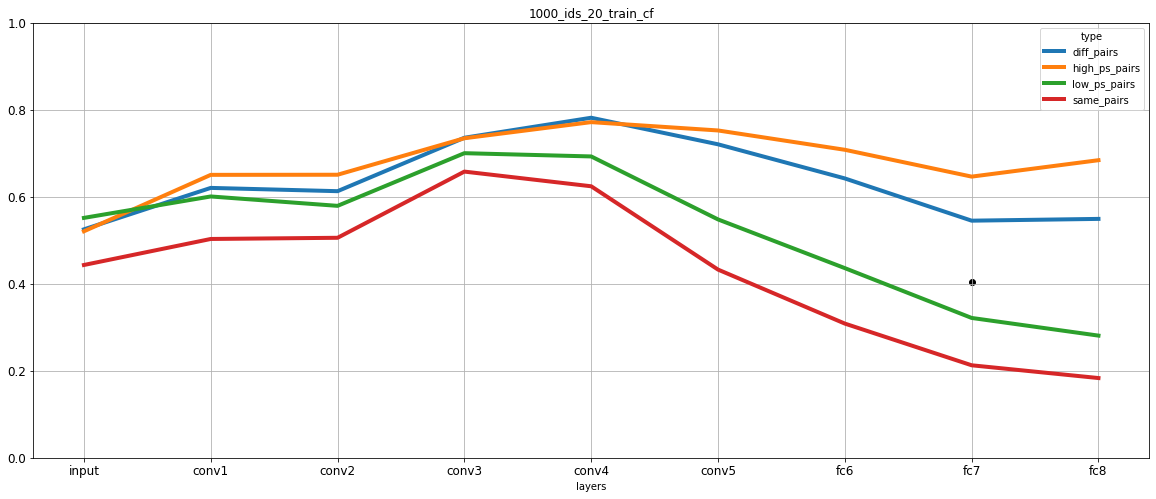

In [20]:
plot = means_df.plot(**plot_kwargs, title = title, ylim = [0,1], lw=4)
# plt.axhline(y=normalized_treshold, color='black', linestyle='--')
plt.scatter(7, normalized_treshold, color='black')


In [21]:
std_df = df.groupby(['type']).std()
std_df['fc7']

type
diff_pairs       0.130685
high_ps_pairs    0.149405
low_ps_pairs     0.076200
same_pairs       0.119767
Name: fc7, dtype: float64